In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
# import scipy

# Salary Set

## Analize

### Analiza tipului de atribute și a plajei de valori a acestora

In [2]:

salary = pd.read_csv('tema2_SalaryPrediction/SalaryPrediction_full.csv')
attributes = list(salary.columns)
label = 'money' ## eticheta pe care o vom prezice
attributes.remove(label)
numerical_columns = salary.describe().columns
categorical_columns = [attribute for attribute in attributes if attribute not in numerical_columns]

salary.describe()

,fnl,hpw,gain,edu_int,years,loss,prod
count,9.999000e+03,9199.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1.903529e+05,40.416241,979.853385,14.262026,38.646865,84.111411,2014.927593
std,1.060709e+05,12.517356,7003.795382,24.770835,13.745101,394.035484,14007.604496
min,1.921400e+04,1.000000,0.000000,1.000000,17.000000,0.000000,-28.000000
25%,1.182825e+05,40.000000,0.000000,9.000000,28.000000,0.000000,42.000000
50%,1.784720e+05,40.000000,0.000000,10.000000,37.000000,0.000000,57.000000
75%,2.373110e+05,45.000000,0.000000,13.000000,48.000000,0.000000,77.000000
max,1.455435e+06,99.000000,99999.000000,206.000000,90.000000,3770.000000,200125.000000


Box Plots pentru atributele numerice din Salary

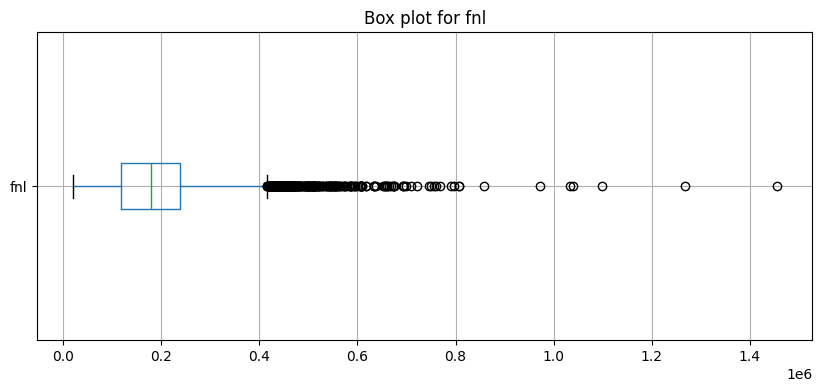

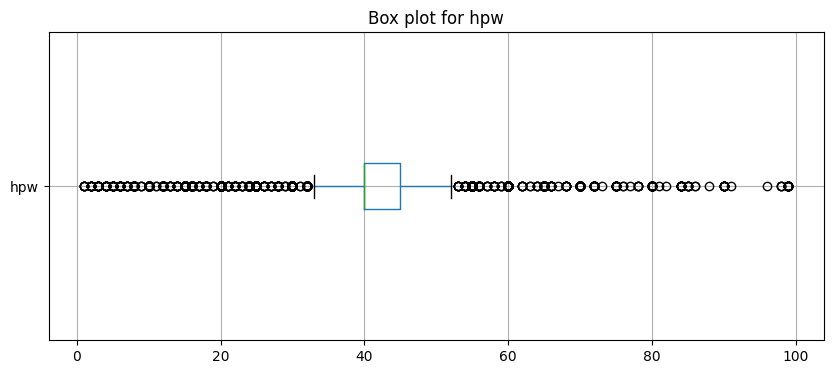

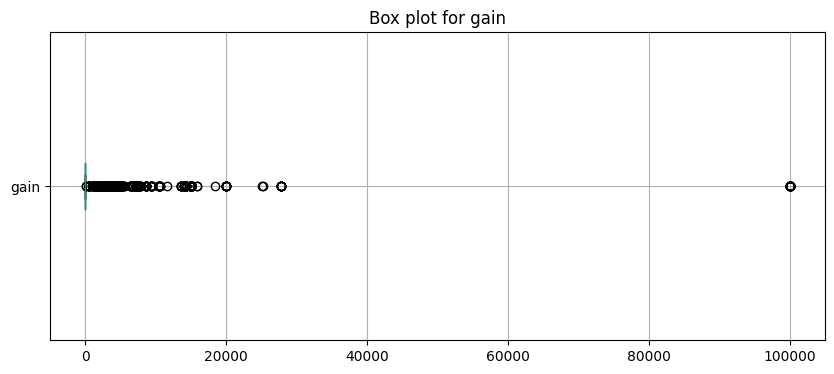

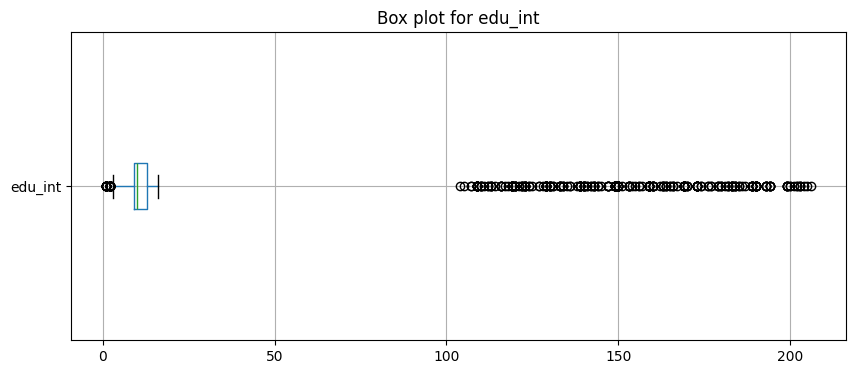

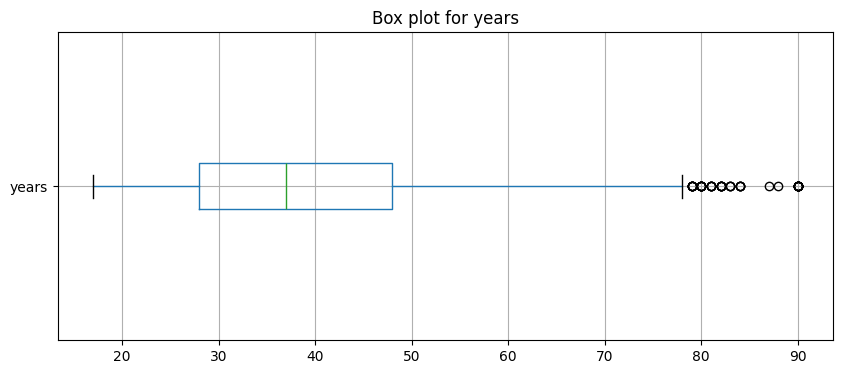

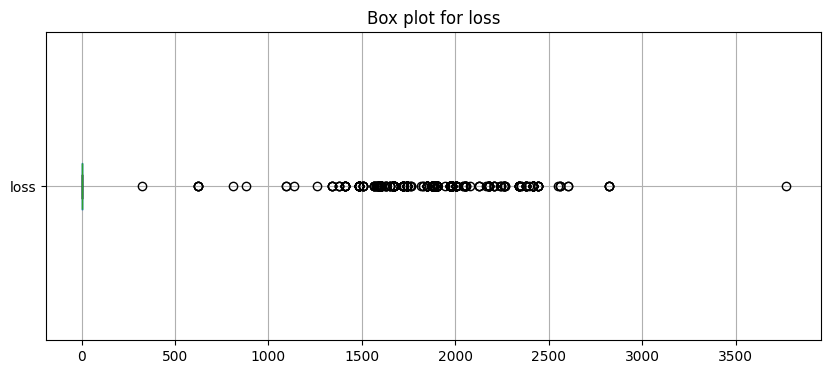

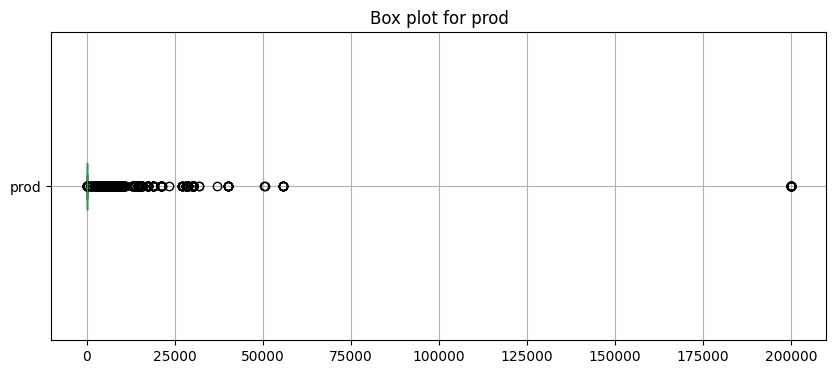

In [3]:

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    salary.boxplot(column=col, vert=False)
    plt.title(f'Box plot for {col}')
    plt.show()

### Analiza pentru atributele categorice

In [4]:
def describe_categorical(data, attribute=categorical_columns):
    num_no_missing = data[attribute].notna().sum()
    num_unique_values = data[attribute].nunique()
    return pd.DataFrame({
            'Attribute': attribute,
            'Num Examples without Missing': num_no_missing.values,
            'Num Unique Values': num_unique_values.values
        })

describe_categorical(salary)

,Attribute,Num Examples without Missing,Num Unique Values
0,relation,9999,6
1,country,9999,41
2,job,9999,14
3,work_type,9999,9
4,partner,9999,7
5,edu,9999,16
6,gender,9199,2
7,race,9999,5
8,gtype,9999,2


Histograme

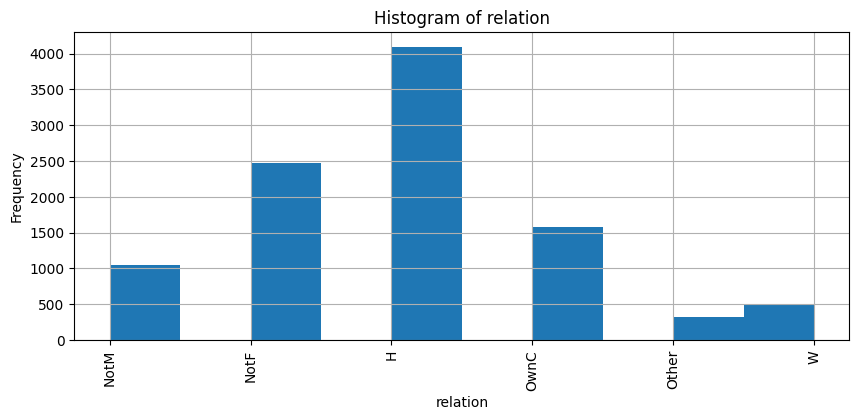

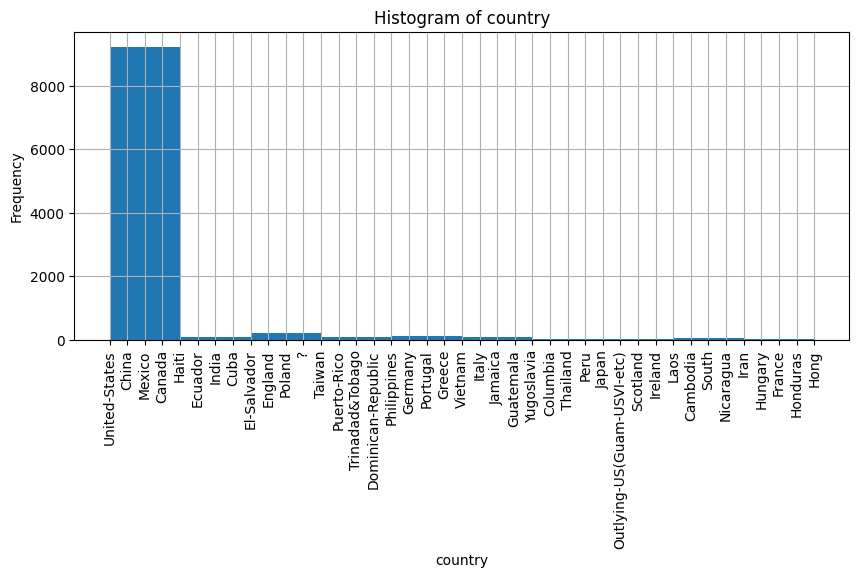

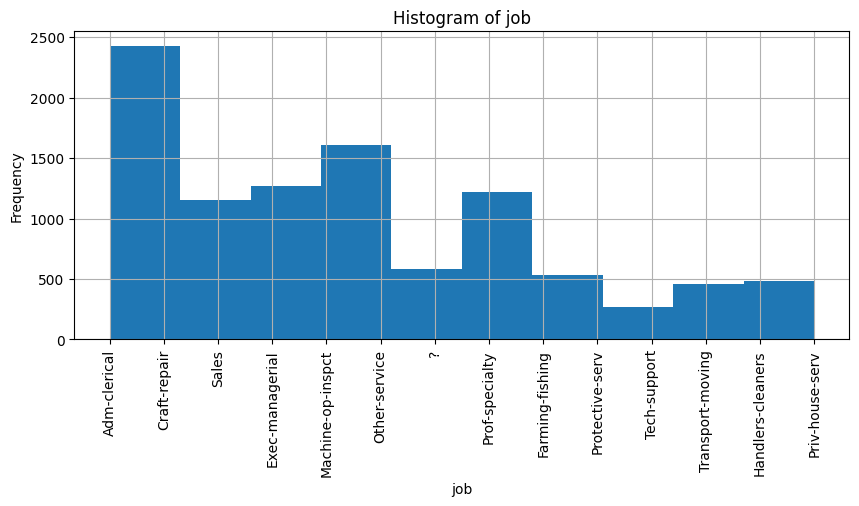

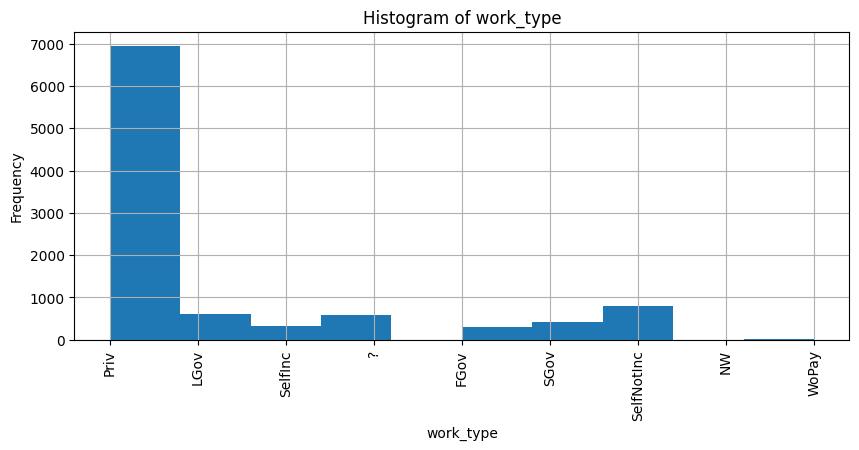

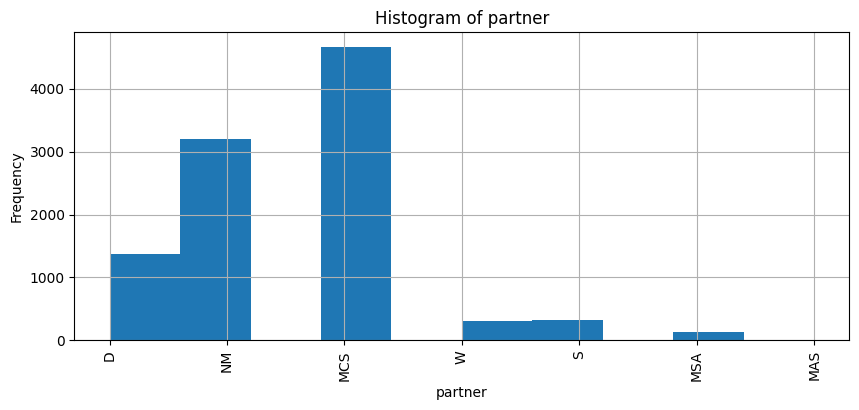

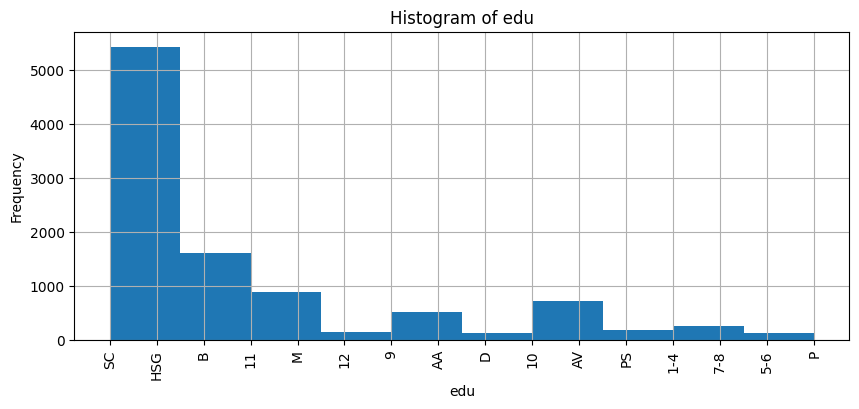

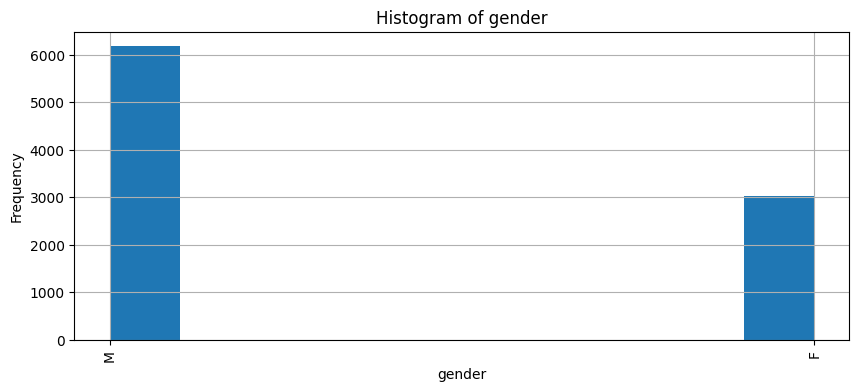

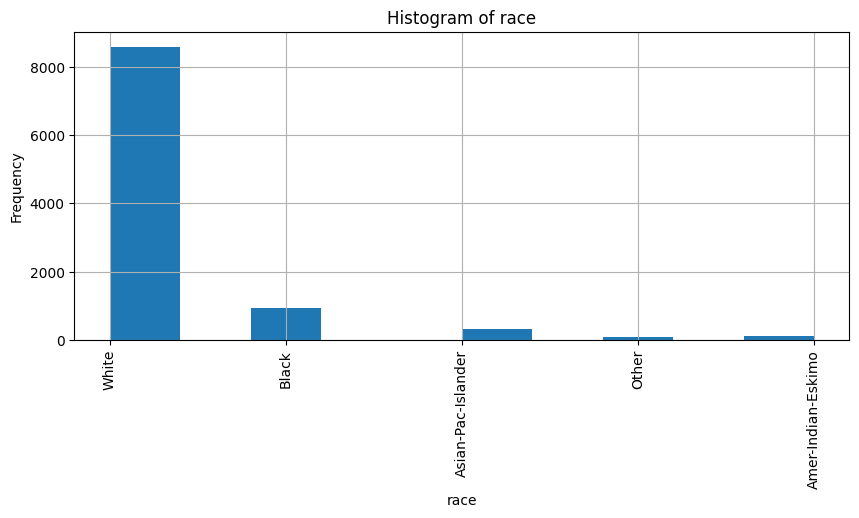

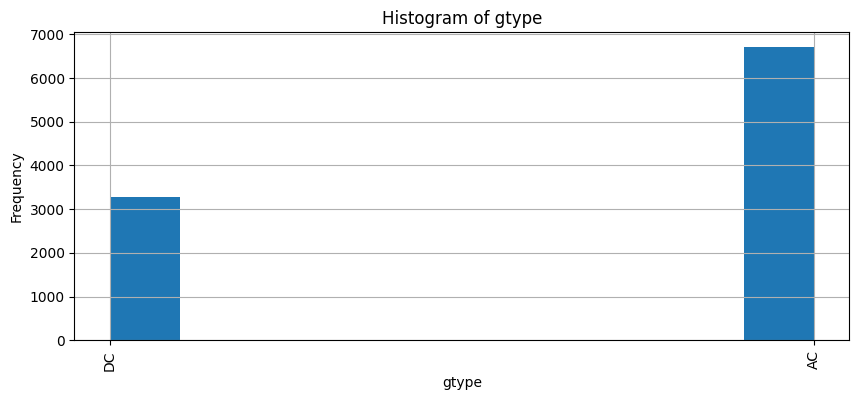

In [5]:

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    salary[col].hist()
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotește etichetele de pe axa x pentru lizibilitate
    plt.show()


### Analiza echilibrului de clase

Analiza setului de antrenare pentru Salary

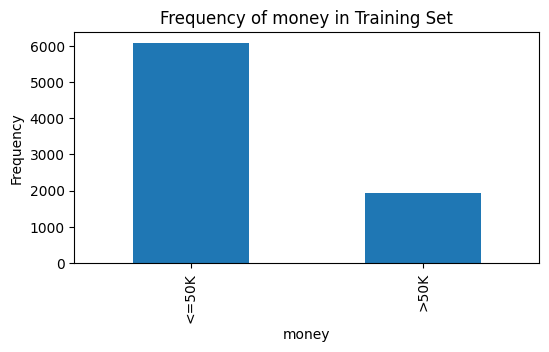

In [6]:
train_df = pd.read_csv('tema2_SalaryPrediction/SalaryPrediction_train.csv')

plt.figure(figsize=(6, 3))
train_df[label].value_counts().plot.bar()
plt.title(f'Frequency of {label} in Training Set')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotește etichetele de pe axa x pentru lizibilitate
plt.show()

Analiza setului de testare pentru Salary

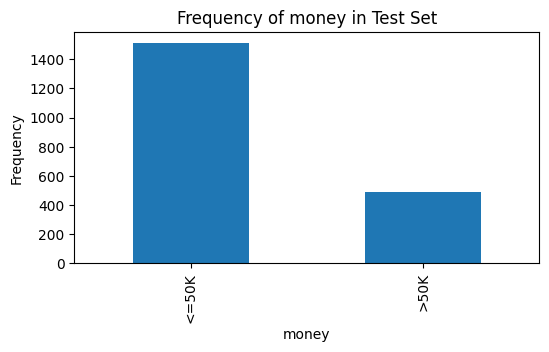

In [7]:
test_df = pd.read_csv('tema2_SalaryPrediction/SalaryPrediction_test.csv')

plt.figure(figsize=(6, 3))
test_df[label].value_counts().plot.bar()
plt.title(f'Frequency of {label} in Test Set')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotește etichetele de pe axa x pentru lizibilitate
plt.show()

### Analiza de corelatie intre atribute

Analiza de corelatie pentru atribute continue

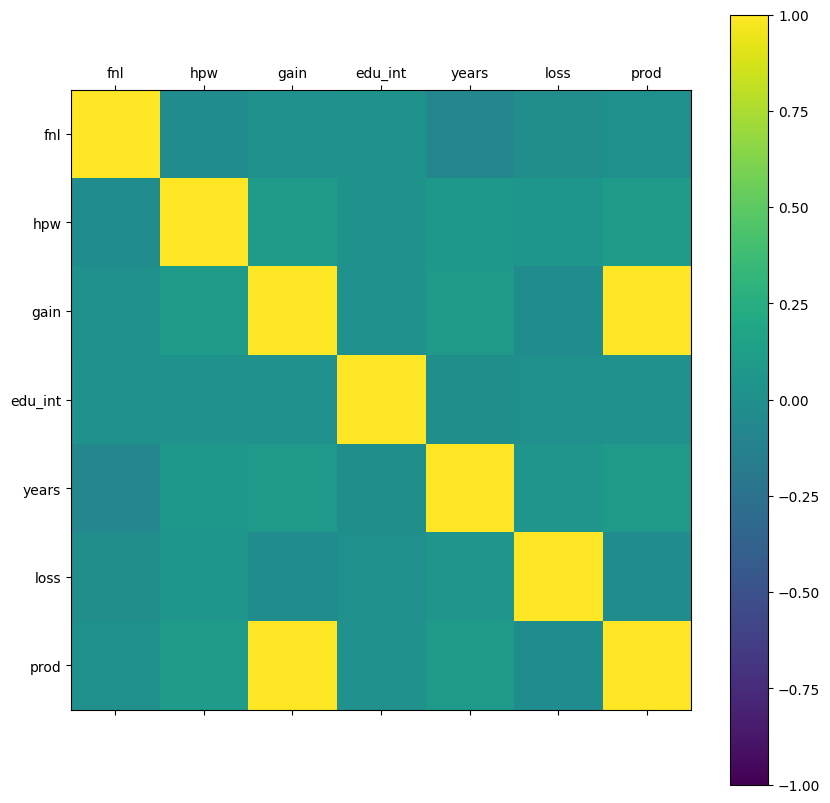

In [8]:
correlations = salary.corr(numeric_only=True, method='pearson')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(numerical_columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numerical_columns)
ax.set_yticklabels(numerical_columns)
plt.show()

Prefer sa dau drop la gain pentru ca pare sa aiba niste valori cam ciudate, adica multe 0 la inceput si un maxim ce pare outlier.

Analiza de corelatie pentru atributele categorice

In [9]:
from itertools import combinations

correlations = pd.DataFrame(data={col:[0.0 for i in range(len(categorical_columns))] for col in categorical_columns}, columns=categorical_columns, index=categorical_columns)
for col in categorical_columns:
        correlations.loc[col, col] = np.float64(1.0)

for pair in combinations(categorical_columns, 2):
        CrossTabResult=pd.crosstab(index=salary[pair[0]], columns=salary[pair[1]])

        ChiSqResult = chi2_contingency(CrossTabResult)
        # P-Value is the Probability of H0 being True
        # If P-Value&gt;0.05 then only we Accept the assumption(H0)
        correlations.at[pair[0], pair[1]] = 0 if ChiSqResult[1] > 0.05 else 1
        correlations.at[pair[1], pair[0]] = 0 if ChiSqResult[1] > 0.05 else 1
        
        # print(f'{pair[0]} - {pair[1]}: The P-Value of the ChiSq Test is: {ChiSqResult[1]} so we {"accept" if ChiSqResult[1]>0.05 else "reject"} the assumption that the two attributes are independent')

### Mai bine ne uitam dintr-o alta lumina..

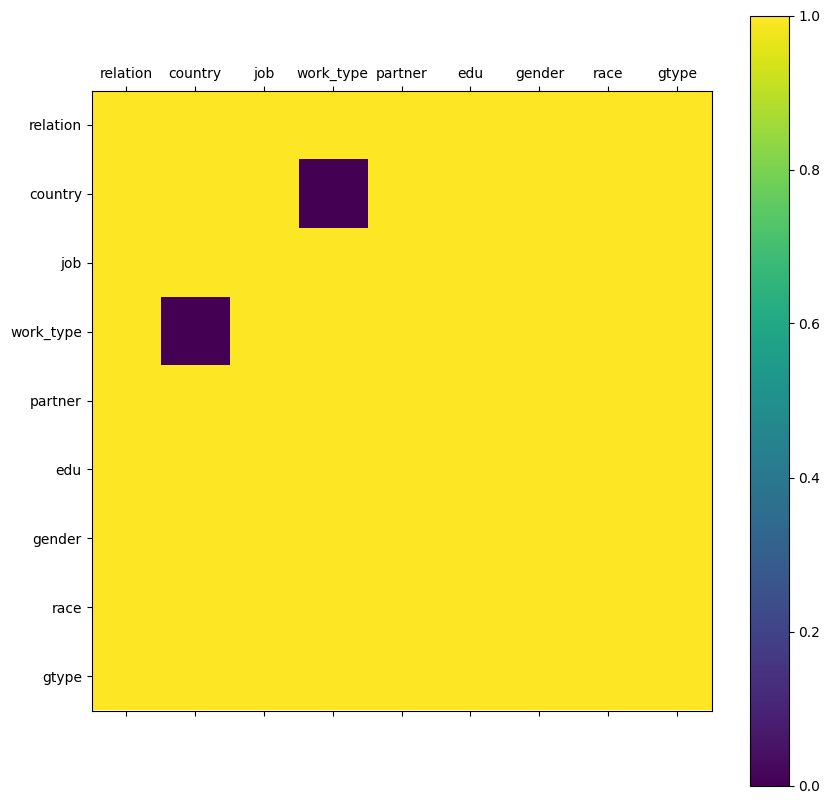

In [10]:
# print(correlations)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations)
fig.colorbar(cax)
ticks = np.arange(0,len(categorical_columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(categorical_columns)
ax.set_yticklabels(categorical_columns)
plt.show()

What the sigma? Orice nu e mov e dependent, restul sunt independente. Doar work_type si country sunt independente intre ele, dar sunt dependene de orice altceva. Mai departe vom trece numai cu una dintre ele.

# Preprocesarea datelor

### Imputarea variabilelor lipsa si extreme

Cum se vede si din tabel atributele ce au valori lipsa sunt hpw si gender. Gender oricum o sa iasa deci nu are rost sa la imputez

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(salary[numerical_columns])
salary[numerical_columns] = imp.transform(salary[numerical_columns])
salary.describe()

,fnl,hpw,gain,edu_int,years,loss,prod
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1.903529e+05,40.415884,979.853385,14.262026,38.646865,84.111411,2014.927593
std,1.060709e+05,12.012194,7003.795382,24.770835,13.745101,394.035484,14007.604496
min,1.921400e+04,1.000000,0.000000,1.000000,17.000000,0.000000,-28.000000
25%,1.182825e+05,39.930087,0.000000,9.000000,28.000000,0.000000,42.000000
50%,1.784720e+05,40.000000,0.000000,10.000000,37.000000,0.000000,57.000000
75%,2.373110e+05,45.000000,0.000000,13.000000,48.000000,0.000000,77.000000
max,1.455435e+06,99.000000,99999.000000,206.000000,90.000000,3770.000000,200125.000000


### Stegerea maximelor si minimelor
What the sigma is happening with loss, prod and gain??

In [12]:
for att in numerical_columns:
    Q1 = salary[att].quantile(0.25)
    Q3 = salary[att].quantile(0.75)
    iqr = Q3 - Q1
    threshold = 1.5
    salary.loc[(salary[att] < Q1 - threshold * iqr) | (salary[att] > Q3 + threshold * iqr), att] = np.nan

salary.describe()

,fnl,hpw,gain,edu_int,years,loss,prod
count,9697.000000,7406.000000,9219.0,9634.000000,9952.000000,9549.0,9185.000000
mean,180164.468289,41.492156,0.0,10.098817,38.434486,0.0,55.251497
std,87513.545336,3.845908,0.0,2.499163,13.421640,0.0,24.471146
min,19214.000000,33.000000,0.0,3.000000,17.000000,0.0,-8.000000
25%,117022.000000,40.000000,0.0,9.000000,28.000000,0.0,37.000000
50%,175935.000000,40.000000,0.0,10.000000,37.000000,0.0,57.000000
75%,228583.000000,41.128386,0.0,12.000000,47.250000,0.0,72.000000
max,415520.000000,52.000000,0.0,16.000000,78.000000,0.0,127.000000


In [13]:
imp.fit(salary[numerical_columns])
salary[numerical_columns] = imp.transform(salary[numerical_columns])
salary.describe()

,fnl,hpw,gain,edu_int,years,loss,prod
count,9999.000000,9999.000000,9999.0,9999.000000,9999.000000,9999.0,9999.000000
mean,180203.021076,41.480717,0.0,10.099126,38.434168,0.0,55.262085
std,86186.117177,3.325579,0.0,2.454220,13.390340,0.0,23.454300
min,19214.000000,33.000000,0.0,3.000000,17.000000,0.0,-8.000000
25%,118282.500000,40.000000,0.0,9.000000,28.000000,0.0,42.000000
50%,177277.000000,40.000000,0.0,10.000000,37.000000,0.0,55.513678
75%,225799.000000,41.819709,0.0,12.000000,47.000000,0.0,72.000000
max,415520.000000,52.000000,0.0,16.000000,78.000000,0.0,127.000000


Acum valorile maxime si minime sunt sterse si inlocuite de unele mai normale.

### Atribute redundante

Cum reiese din primul grafic gain si prob sunt puternic corelate, deci putem scapa de una dintre ele. Voi alege sa scap de gain.

In [14]:
df = salary.drop(columns=['gain'])
numerical_columns = df.describe().columns
categorical_columns = [attribute for attribute in attributes if attribute not in numerical_columns]
df

,fnl,hpw,relation,country,job,edu_int,years,loss,work_type,partner,edu,gender,race,prod,gtype,money
0,264627.0,40.000000,NotM,United-States,Adm-clerical,10.0,38.0,0.0,Priv,D,SC,NaN,White,77.0,DC,<=50K
1,151369.0,40.000000,NotF,United-States,Craft-repair,9.0,62.0,0.0,LGov,NM,HSG,M,White,87.0,AC,<=50K
2,188615.0,42.098965,H,United-States,Sales,13.0,42.0,0.0,SelfInc,MCS,B,M,White,77.0,AC,>50K
3,151089.0,41.495667,H,United-States,Exec-managerial,10.0,41.0,0.0,SelfInc,MCS,SC,M,White,107.0,AC,>50K
4,177625.0,40.000000,NotF,United-States,Machine-op-inspct,9.0,25.0,0.0,Priv,NM,HSG,M,White,57.0,AC,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,187487.0,40.000000,H,United-States,Machine-op-inspct,9.0,58.0,0.0,Priv,MCS,HSG,M,White,22.0,AC,<=50K
9995,400416.0,45.000000,OwnC,United-States,Machine-op-inspct,7.0,34.0,0.0,Priv,NM,11,M,Black,57.0,AC,<=50K
9996,87164.0,41.490985,Other,United-States,Sales,7.0,65.0,0.0,Priv,W,11,F,White,82.0,DC,<=50K
9997,22641.0,45.000000,H,United-States,Machine-op-inspct,9.0,29.0,0.0,Priv,MCS,HSG,M,Amer-Indian-Eskimo,62.0,AC,<=50K


### Plaje valorice de mărimi diferite pentru atributele numerice

In [15]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(df[numerical_columns])
df[numerical_columns] = transformer.transform(df[numerical_columns])
df

,fnl,hpw,relation,country,job,edu_int,years,loss,work_type,partner,edu,gender,race,prod,gtype,money
0,0.812433,0.000000,NotM,United-States,Adm-clerical,0.000000,0.052632,0.0,Priv,D,SC,NaN,White,0.716211,DC,<=50K
1,-0.240968,0.000000,NotF,United-States,Craft-repair,-0.333333,1.315789,0.0,LGov,NM,HSG,M,White,1.049544,AC,<=50K
2,0.105454,1.153462,H,United-States,Sales,1.000000,0.263158,0.0,SelfInc,MCS,B,M,White,0.716211,AC,>50K
3,-0.243572,0.821927,H,United-States,Exec-managerial,0.000000,0.210526,0.0,SelfInc,MCS,SC,M,White,1.716211,AC,>50K
4,0.003237,0.000000,NotF,United-States,Machine-op-inspct,-0.333333,-0.631579,0.0,Priv,NM,HSG,M,White,0.049544,AC,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.094962,0.000000,H,United-States,Machine-op-inspct,-0.333333,1.105263,0.0,Priv,MCS,HSG,M,White,-1.117123,AC,<=50K
9995,2.075393,2.747692,OwnC,United-States,Machine-op-inspct,-1.000000,-0.157895,0.0,Priv,NM,11,M,Black,0.049544,AC,<=50K
9996,-0.838132,0.819353,Other,United-States,Sales,-1.000000,1.473684,0.0,Priv,W,11,F,White,0.882877,DC,<=50K
9997,-1.438254,2.747692,H,United-States,Machine-op-inspct,-0.333333,-0.421053,0.0,Priv,MCS,HSG,M,Amer-Indian-Eskimo,0.216211,AC,<=50K


# Utilizarea Algoritmilor de invatare automata

## Arbori de decizie

### Sklearn

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support as score

X = df.drop(columns=[label])
y = df[label]

X = pd.get_dummies(X)

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [17]:

clf = DecisionTreeClassifier(criterion='entropy', max_depth=100).fit(X_train, y_train)

salary_accuracy_dtc = accuracy_score(y_test, clf.predict(X_test))

precision_recall_fscore_salary_dtc = score(y_test, clf.predict(X_test), average='weighted')



## Raport

Setul de parametrii:    
Criterion: entropy  
max_depty:100

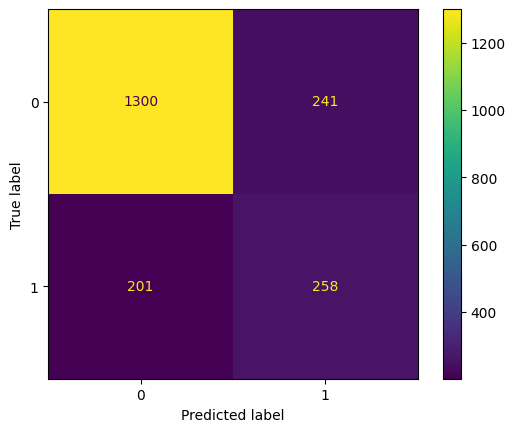

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score


ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

### Implementarea mea

In [19]:
from __future__ import annotations  # Necesar pentru a folosi tipul clasei în definiția ei
from typing import Optional, Dict, Callable
from pathlib import Path
from copy import deepcopy
from collections import Counter

In [20]:
class DecisionTreeNode:
    """
    Un nod din arborele de decizie. Acesta poate fi un nod intermediar sau un nod frunză.
    """
    
    def __init__(self, 
                 feature: Optional[str] = None, 
                 children: Optional[Dict[str, DecisionTreeNode]] = None, 
                 label: Optional[str] = None):
        """
        Constructor pentru un nod din arborele de decizie
        
        Args:
            feature (str, optional): 
                Numele atributului după care se face împărțirea. Defaults to None.
            children (Dict[str, DecisionTreeNode], optional): 
                Un dictionar ce conține subarborii nodului curent. Defaults to None.
            label (str, optional): 
                Clasa nodului frunză. Defaults to None.
        """
        self.split_feature = feature  # Numele atributului după care se face împărțirea (None pentru nodurile frunză)
        self.children = children if (children is not None and feature is not None) else {}
        self.label = label    # Clasa nodului frunză (None pentru nodurile intermediare)
        self.depth = 1        # Adâncimea nodului în arbore (se calculează în timpul construcției arborelui)
        self.score = 0        # Scorul nodului (se calculează în timpul construcției arborelui)
        self.num_samples = 0  # Numărul de exemple din setul de date care ajung în nodul curent

In [21]:
class DecisionTree:
    """
    Clasa care implementează un arbore de decizie. 
    Arborele poate fi construit folosind algoritmul ID3 sau Random Tree, în funcție de strategia de împărțire specificată.
    """
    def __init__(self,
                 split_strategy: str = 'random',
                 max_depth: int = np.inf,
                 min_samples_per_node: int = 1):
        """
        Constructor pentru un arbore de decizie
        
        Args:
            split_strategy (string, optional): 
                Strategia folosită pentru alegerea împărțirii într-un nod. Aceasta poate fi:
                - 'id3' - alege împărțirea care maximizează câștigul informațional (folosind algoritmul ID3)
                - 'random' - alege aleator o împărțire
                Defaults to 'random'.
            max_depth (int, optional): 
                Adâncimea maximă a arborelui. Defaults to infinity.
            min_samples_per_node (int, optional): 
                Numărul minim de exemple dintr-un nod pentru a face o împărțire. 
                Defaults to 1.
        """
        self._root: DecisionTreeNode | None = None # Rădăcina arborelui
        self._split_strategy: str = split_strategy
        self._max_depth: int = max_depth
        self._min_samples_per_node: int = min_samples_per_node
        
        
    @staticmethod
    def most_frequent_class(y: pd.Series) -> str:
        """
        Obține clasa majoritară din setul de date
        
        Args:
            y (pd.DataFrame): 
                Vectorul de clase. Fiecare element reprezintă clasa unui exemplu din setul de date
        
        Returns:
            str: 
                Clasa majoritară din setul de date
        
        Examples:
            >>> most_frequent_class(pd.Series(['a', 'a', 'b', 'b', 'b']))
            'b'
        """
        # 1. Obțineți clasa majoritară din setul de date
        # HINT: Folosiți funcția mode() pentru a obține clasa majoritară
        return y.mode().values[0]
    
    
    @staticmethod
    def compute_gini(groups, y: pd.Series) -> float:
        """
        Calculează entropia setului de date
        
        Args:
            y (pd.Series): 
                Vectorul de clase. Fiecare element reprezintă clasa unui exemplu din setul de date
        
        Returns:
            float: 
                Entropia setului de date
        
        Examples:
            >>> DecisionTree.compute_entropy(pd.Series(['a', 'a', 'b', 'b', 'b']))
            0.9709505944546686
        """
        n_instances = float(sum([len(group) for group in groups]))
        # sum weighted Gini index for each group
        gini = 0.0
        for group in groups:
            size = float(len(group))
            # avoid divide by zero
            if size == 0:
                continue
            score = 0.0
            # score the group based on the score for each class
            for class_val in y:
                p = [row[-1] for row in group].count(class_val) / size
                score += p * p
            # weight the group score by its relative size
            gini += (1.0 - score) * (size / n_instances)
        return gini  
    
    def _select_best_split_feature(self, X: pd.DataFrame, y: pd.Series, attribute_list: list[str]) -> str:

        def test_split(feature, value, dataset):
            left, right = list(), list()
            for _, row in dataset.iterrows():
                if row[feature] < value:
                    left.append(row)
                else:
                    right.append(row)
            return left, right

        b_index, b_value, b_score, b_groups = 999, 999, 999, None

        for feature in attribute_list:
            for index, row in X.iterrows():
                groups = test_split(feature, row[feature], X)
                gini = DecisionTree.compute_gini(groups, y)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups

        return b_index, b_value

    
    
    def _generate_tree(self,
                       parent_node: DecisionTreeNode | None,
                       X: pd.DataFrame,
                       y: pd.Series,
                       feature_list: list[str],
                       select_feature_func: Callable[[pd.DataFrame, pd.Series, list[str]], str]) -> DecisionTreeNode:
        """
        Construiește arborele de decizie pe baza setului de date X și a claselor țintă y
        
        Args:
            parent_node (DecisionTreeNode): 
                Nodul părinte al nodului curent
            X (pd.DataFrame): 
                Setul de date (atributele)
            y (pd.Series): 
                Clasele corespunzătoare fiecărui exemplu din setul de date
            feature_list (list[str]): 
                Lista de atribute rămase pentru construcția arborelui
            select_feature_func (Callable[[pd.DataFrame, pd.Series, list[str]], str]):
                Funcția folosită pentru a alege atributul după care se face împărțirea
                
        Returns:
            DecisionTreeNode: 
                Nodul rădăcină al arborelui de decizie construit
                
        Examples:
            >>> # Funcția este privată și nu poate fi apelată în afara clasei
            >>> X = pd.DataFrame({'a': [1, 1, 1, 0, 0], 'b': [0, 0, 0, 1, 1]})
            >>> y = pd.Series(['a', 'a', 'b', 'b', 'b'])
            >>> self._generate_tree(None, X, y, ['a', 'b'], self._select_random_split_feature)
            <DecisionTreeNode>
        """
        # Se face o copie a listei de atribute pentru a nu modifica lista inițială
        feature_list = deepcopy(feature_list)
        
        # Se creează un nou nod pentru arbore
        node = DecisionTreeNode()
        node.depth = parent_node.depth + 1 if parent_node is not None else 0
        node.num_samples = len(y)
        node.label = DecisionTree.most_frequent_class(y)
        
        # TODO 6. Verificați dacă nodul curent este frunză
        # Nodul curent este frunză dacă:
        #   1. Nu mai sunt atribute rămase
        #   2. Adâncimea maximă a fost atinsă (se va compara adânimea curentă a nodului cu adâncimea maximă a arborelui)
        #   3. Numărul minim de exemple dintr-un nod pentru a face o împărțire nu este îndeplinit (se va compara
        #   numărul de exemple din nod cu numărul minim de exemple)
        #   4. Toate exemplele din setul de date aparțin unei singure clase (TIP: se poate folosi funcția `nunique()`
        #   din pandas pentru a obține numărul de clase distincte)
        if len(y.unique()) == 1 or node.depth >= self._max_depth or len(y) < self._min_samples_per_node or len(feature_list) == 0:
            return node
        
        # TODO 7. Construiți subarborele pentru nodul curent
        # 1. Se alege atributul după care se face împărțirea (se va folosi funcția `select_feature_func`)
        # 2. Se actualizează lista de atribute rămase pentru construcția subarborilor
        # 3. Se actualizează nodul curent cu atributul de împărțire
        # 4. Se construiesc subarborii pentru fiecare valoare posibilă a atributului de împărțire:
        #   - Se iterează prin valorile posibile ale atributului de împărțire
        #   - Se selectează submulțimea de exemple care au valoarea `value` pentru atributul `split_feature`
        #   - Se construiește subarborele pentru submulțimea de exemple
        #   - Se adaugă subarborele la nodul curent
        # HINT:
        #   Pentru a obține valorile posibile ale unui atribut puteți folosi funcția unique() din pandas:
        #       X[split_feature].unique()
        # HINT:
        #   Pentru a calcula submulțimea de exemple care au valoarea `value` pentru atributul `split_feature` puteți folosi
        #   următoarele expresii: 
        #       X[X[split_feature] == value].
        #       y[X[split_feature] == value].
        split_feature, value = select_feature_func(X, y, feature_list)
        # feature_list.remove(split_feature)
        # node.split_feature = split_feature
        # for value in X[split_feature].unique():
        #     node.children[value] = self._generate_tree(node, X[X[split_feature] == value], y[X[split_feature] == value], feature_list, select_feature_func)
        node.children['left'] = self._generate_tree(node, X[X[split_feature] < value], y[X[split_feature] < value], feature_list, select_feature_func)

        node.children['right'] = self._generate_tree(node, X[X[split_feature] >= value], y[X[split_feature] >= value], feature_list, select_feature_func)
        # Pentru fiecare valoare `value` a atributului `split_feature`
        # Se selectează submulțimea de exemple care au valoarea `value` pentru atributul `split_feature`
        # Se construiește subarborele pentru submulțimea de exemple
        # Se adaugă subarborele la nodul curent
        
        return node
    
        
    def fit(self, X: pd.DataFrame, y: pd.Series):
        """
        Construiește arborele de decizie pe baza setului de date. 
        Va folosi strategia de împărțire specificată în constructor.
        
        Args:
            X (pd.DataFrame): 
                Setul de date (atributele)
            y (pd.Series): 
                Clasele corespunzătoare fiecărui exemplu din setul de date
        """
        # Selectează funcția de împărțire a nodurilor
        if self._split_strategy == 'random':
            select_feature_func = self._select_random_split_feature
        elif self._split_strategy == 'gini':
            select_feature_func = self._select_best_split_feature
        else:
            raise ValueError(f"Unknown split strategy {self._split_strategy}")
        
        self._root = self._generate_tree(parent_node=None,
                                         X=X,
                                         y=y,
                                         feature_list=X.columns.tolist(),
                                         select_feature_func=select_feature_func)
        
    def _predict_once(self, x: pd.Series) -> str:
        """
        Realizează predicția clasei pentru un singur exemplu x
        
        Args:
            x (pd.Series): 
                Atributele unui exemplu din setul de date
        
        Returns:
            str: 
                Clasa prezisă pentru exemplul x
                
        Examples:
            >>> X = pd.DataFrame({'a': [1, 1, 1, 0, 0], 'b': [0, 0, 0, 1, 1]})
            >>> y = pd.Series(['a', 'a', 'b', 'b', 'b'])
            >>> model = DecisionTree(split_strategy='random')
            >>> model.fit(X, y)
            >>> model._predict_once(pd.Series({'a': 1, 'b': 0}))
            'a'
        """
        node = self._root
        
        while node.split_feature is not None:
            if node.split_feature in x and x[node.split_feature] in node.children:
                node = node.children[x[node.split_feature]]
            else:
                break
        return node.label
        
    def predict(self, X: pd.DataFrame) -> np.ndarray:
        """
        Realizează predicția claselor pentru un set de date X
        
        Args:
            X (pd.DataFrame): Setul de date (atributele) pentru care se dorește clasificarea

        Returns:
            np.ndarray: Un vector cu clasele prezise pentru fiecare exemplu din X
            
        Examples:
            >>> X = pd.DataFrame({'a': [1, 1, 1, 0, 0], 'b': [0, 0, 0, 1, 1]})
            >>> y = pd.Series(['a', 'a', 'b', 'b', 'b'])
            >>> model = DecisionTree(split_strategy='random')
            >>> model.fit(X, y)
            >>> model.predict(X)
            array(['a', 'a', 'b', 'b', 'b'], dtype=object)
        """
        return np.array([self._predict_once(x) for _, x in X.iterrows()])
    
    def get_depth(self) -> int:
        """
        Returnează adâncimea arborelui
        
        Returns:
            int: Adâncimea arborelui
        """
        # Se parcurge arborele pentru a găsi adâncimea maximă
        def _get_depth(node: DecisionTreeNode) -> int:
            if node is None:
                return 0
            return max([_get_depth(child) for child in node.children.values()], default=0) + 1
        
        return _get_depth(self._root)
    
    def get_number_of_nodes(self) -> int:
        """
        Returnează numărul de noduri din arbore
        
        Returns:
            int: Numărul de noduri din arbore
        """
        # Se parcurge arborele pentru a găsi numărul de noduri
        def _get_number_of_nodes(node: DecisionTreeNode) -> int:
            if node is None:
                return 0
            return sum([_get_number_of_nodes(child) for child in node.children.values()], 0) + 1
        
        return _get_number_of_nodes(self._root)

In [22]:
def precision(y_pred: pd.Series, y_true: pd.Series, c: str) -> float:
    """
    Calculează precizia (precision) unui clasificator. 
    Precizia este definită ca raportul între numărul de exemple clasificate corect cu clasa `c` și numărul total de exemple clasificate cu clasa `c`.
    
    Args:
        y_pred (pd.Series): 
            Clasele prezise de clasificator
        y_true (pd.Series): 
            Clasele reale din setul de date
        c (str):
            Clasa pentru care se calculează precizia

    Returns:
        float: 
            Precizia clasificatorului
            
    Examples:
    --------
    >>> precision(y_pred=pd.Series(['a', 'a', 'a', 'a', 'b']), 
    >>>           y_true=pd.Series(['a', 'a', 'a', 'b', 'b']), 
    >>>           c='a')
    0.75
    """
    # Doar exemplele clasificate cu clasa c sunt relevante pentru calculul preciziei
    pred_c = y_pred[y_pred == c]
    
    # Extrage doar exemplele clasificate corect cu clasa c
    true_c = y_true[(y_pred == c) & (y_true == c)]
    
    # Calculul preciziei
    if len(pred_c) == 0:
        return 0
    else:
        return len(true_c) / len(pred_c)
    
def recall(y_pred: pd.Series, y_true: pd.Series, c: str) -> float:
    """
    Calculează acoperirea (recall) unui clasificator. 
    Acoperirea este definită ca raportul între numărul de exemple clasificate corect cu clasa `c` și numărul total de exemple din setul de date cu clasa `c`.
    
    Args:
        y_pred (pd.Series): 
            Clasele prezise de clasificator
        y_true (pd.Series): 
            Clasele reale din setul de date
        c (str): 
            Clasa pentru care se calculează acoperirea

    Returns:
        float: 
            Acoperirea clasificatorului
            
    Examples:
    --------
    >>> recall(y_pred=pd.Series(['a', 'a', 'a', 'a', 'b']),
    >>>        y_true=pd.Series(['a', 'a', 'a', 'b', 'b']),
    >>>        c='a')
    1.0     
    """
    # Doar exemplele din setul de date cu clasa c sunt relevante pentru calculul acoperirii
    true_c = y_true[y_true == c]
    
    # Extrage doar exemplele clasificate corect cu clasa c
    pred_c = y_pred[(y_pred == c) & (y_true == c)]
    
    # Calculul acoperirii
    if len(true_c) == 0:
        return 0
    else:
        return len(pred_c) / len(true_c)
    
def f1_score(y_pred: pd.Series, y_true: pd.Series, c: str) -> float:
    """
    Calculează scorul F1 al unui clasificator. 
    Scorul F1 este definit ca media armonică între precizie și acoperire.
    
    Args:
        y_pred (pd.Series): 
            Clasele prezise de clasificator
        y_true (pd.Series): 
            Clasele reale din setul de date
        c (str):
            Clasa pentru care se calculează scorul F1

    Returns:
        float: 
            Scorul F1 al clasificatorului
            
    Examples:
    --------
    >>> f1_score(y_pred=pd.Series(['a', 'a', 'a', 'a', 'b']),
    >>>           y_true=pd.Series(['a', 'a', 'a', 'b', 'b']),
    >>>           c='a')
    0.8571428571428571
    """
    # Calculul scorului F1
    p = precision(y_pred, y_true, c)
    r = recall(y_pred, y_true, c)
    
    if p + r == 0:
        return 0
    else:
        return 2 * p * r / (p + r)
    
def accuracy(y_pred: pd.Series, y_true: pd.Series) -> float:
    """
    Calculează acuratețea unui clasificator. 
    Acuratețea este definită ca raportul între numărul de exemple clasificate corect și numărul total de exemple din setul de date.
    
    Args:
        y_pred (pd.Series): 
            Clasele prezise de clasificator
        y_true (pd.Series): 
            Clasele reale din setul de date

    Returns:
        float: 
            Acuratețea clasificatorului
            
    Examples:
    --------
    >>> accuracy(pd.Series(['a', 'a', 'a', 'a', 'b']), pd.Series(['a', 'a', 'a', 'b', 'b']))
    0.8
    """
    # Calculul acurateței
    return (y_pred == y_true).sum() / len(y_true)

def evaluate(tree: DecisionTree, X: pd.DataFrame, y: pd.Series):
    """
    Evaluează un arbore de decizie / pădure de arbori de decizie pe un set de date X.
    Pentru evaluare se va folosi de funcția `predict` a arborelui de decizie / pădurii de arbori de decizie.
    
    Rezultatul va fi un tabel cu metricile de evaluare: acuratețe, precizie, recall, f1-score.
        
    Args:
        tree (DecisionTreeNode): 
            Arborele de decizie / pădurea de arbori de decizie
        X (pd.DataFrame): 
            Setul de date (atributele) pentru care se dorește clasificarea
        y (pd.Series):
            Clasele corespunzătoare fiecărui exemplu din setul de date
    Examples
    --------
    >>> evaluate(tree, X_test)
                  precision    recall  f1-score   support

             acc       0.61      0.73      0.66        90
            good       0.00      0.00      0.00        11
           unacc       0.91      0.92      0.92       231
           vgood       0.00      0.00      0.00        14
    
        accuracy                           0.81       346
       macro avg       0.38      0.41      0.39       346
    weighted avg       0.77      0.81      0.78       346
    """
    from sklearn.metrics import classification_report

    y_pred = tree.predict(X)
    print(classification_report(y, y_pred, zero_division=0))
    
def plot_confusion_matrix(y_pred: pd.Series, y_true: pd.Series):
    """
    Construiește matricea de confuzie pentru un clasificator.
    
    Args:
        y_pred (pd.Series): 
            Clasele prezise de clasificator
        y_true (pd.Series): 
            Clasele reale din setul de date
    """
    confusion_matrix = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], dropna=False)

    # Adăugăm toate clasele prezise și reale pentru a avea toate clasele în matricea de confuzie
    all_classes = np.unique(list(y_true) + list(y_pred))
    confusion_matrix = confusion_matrix.reindex(index=all_classes, columns=all_classes, fill_value=0)

    print(confusion_matrix)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

In [23]:
y_train = pd.Series(y_train)

In [24]:
# decision_tree = DecisionTree(split_strategy='gini')
# decision_tree.fit(X_train, y_train)
# accuracy = accuracy(decision_tree.predict(X_test), y_test)
# print(f'Accuracy: {accuracy:.2f}')

## MLP

### Sklearn

In [25]:
X = df.drop(columns=[label])
y = df[label]

X = pd.get_dummies(X)

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


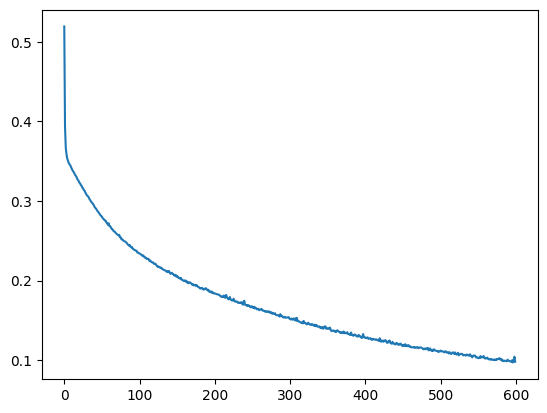

In [26]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=600).fit(X_train, y_train)

salary_accuracy_mlp = accuracy_score(y_test, clf.predict(X_test))

precision_recall_fscore_salary_mlp = score(y_test, clf.predict(X_test), average='weighted')

plt.plot(clf.loss_curve_)


## Raport

Setul de parametrii:    
max_iter: 600

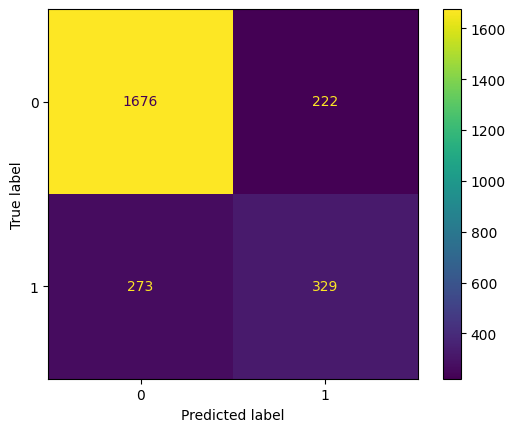

In [27]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

# Credit Risk

## Analize

### Analiza tipului de atribute și a plajei de valori a acestora

In [28]:
credit = pd.read_csv('tema2_Credit_Risk/credit_risk_full.csv')
attributes = list(credit.columns)
label = 'loan_approval_status' ## eticheta pe care o vom prezice
attributes.remove(label)
numerical_columns = credit.describe().columns
categorical_columns = [attribute for attribute in attributes if attribute not in numerical_columns]

credit.describe()

,loan_rate,loan_amount,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_income_ratio,credit_history_length_months
count,9060.000000,10000.000000,9736.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,11.007179,9568.037500,4.785744,5.811100,27.745100,6.573421e+04,0.170130,75.760700
std,3.266393,6350.431581,4.353122,4.050217,6.360155,5.694439e+04,0.106814,48.677362
min,5.420000,500.000000,0.000000,2.000000,20.000000,4.200000e+03,0.000000,25.000000
25%,7.900000,5000.000000,2.000000,3.000000,23.000000,3.859500e+04,0.090000,41.000000
50%,10.990000,8000.000000,4.000000,4.000000,26.000000,5.500000e+04,0.150000,57.000000
75%,13.470000,12200.000000,7.000000,8.000000,30.000000,7.899700e+04,0.230000,102.000000
max,23.220000,35000.000000,123.000000,30.000000,123.000000,2.039784e+06,0.760000,369.000000


Box Plots pentru atributele numerice din Salary
B

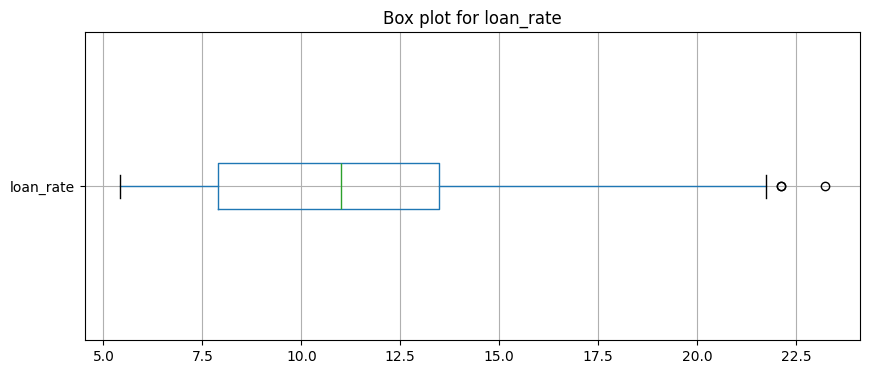

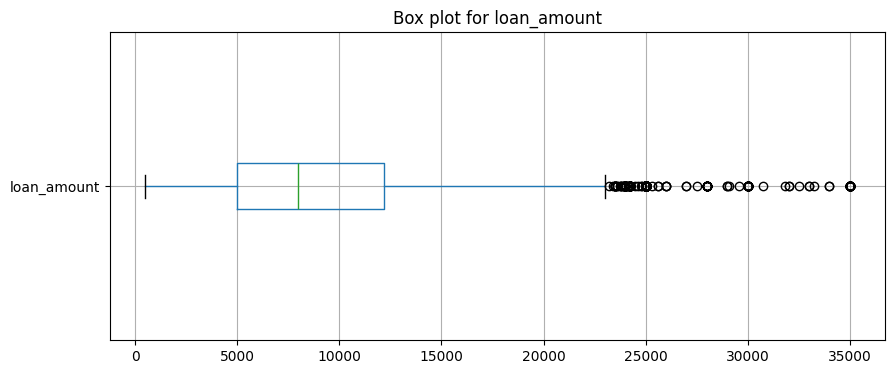

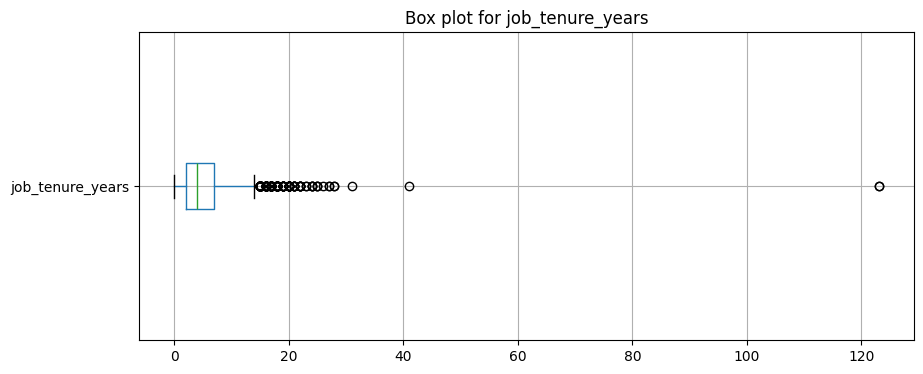

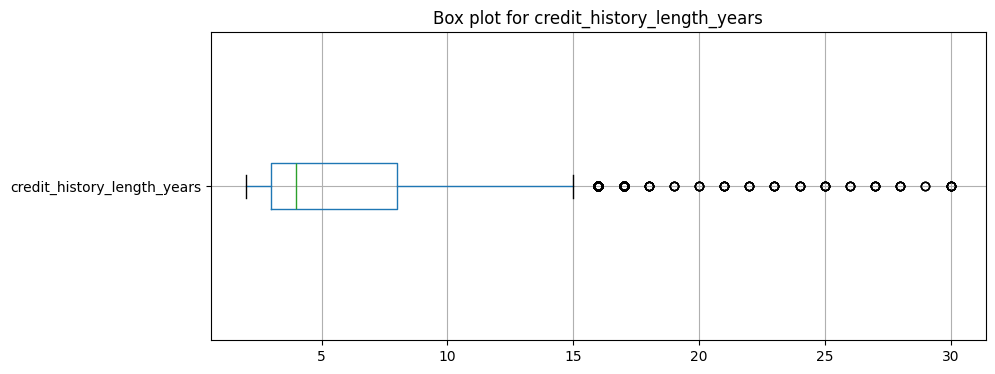

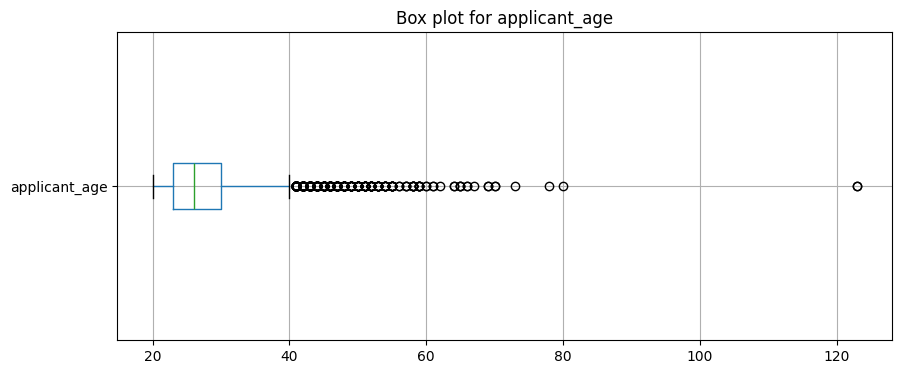

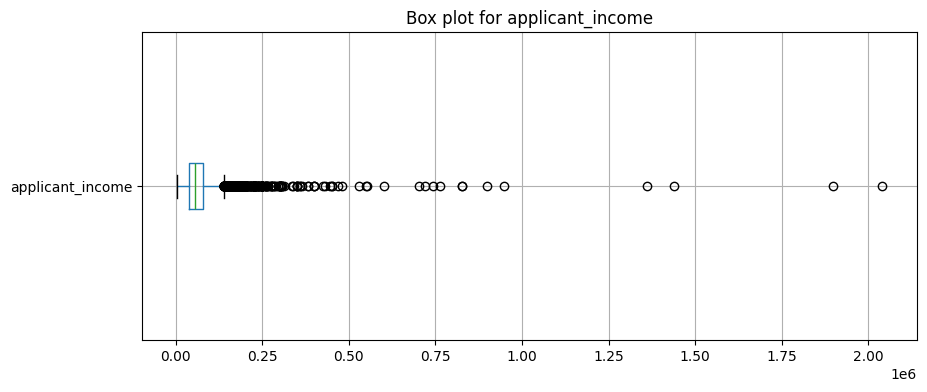

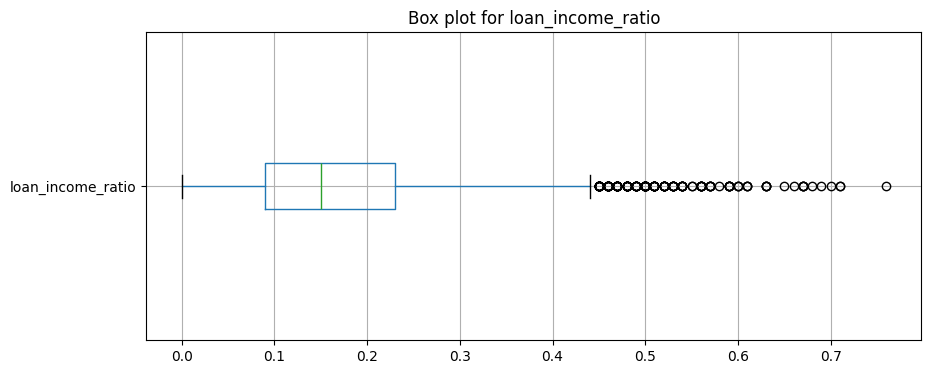

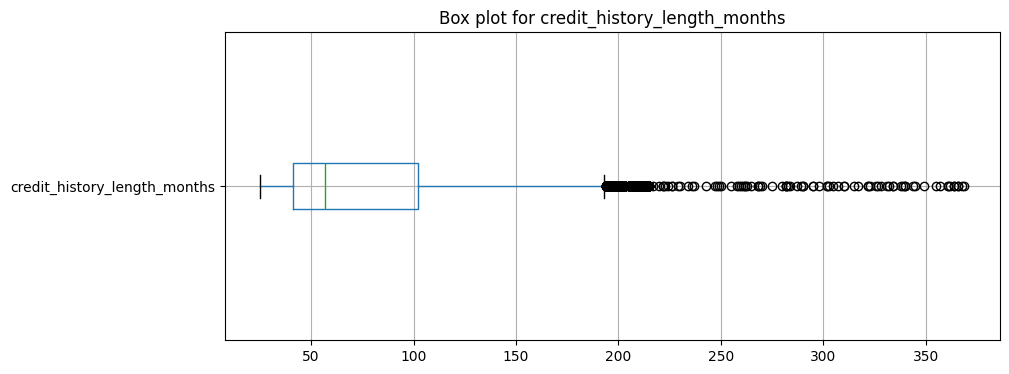

In [29]:
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    credit.boxplot(column=col, vert=False)
    plt.title(f'Box plot for {col}')
    plt.show()

### Analiza pentru atributele categorice

In [30]:
describe_categorical(credit, categorical_columns)

,Attribute,Num Examples without Missing,Num Unique Values
0,residential_status,10000,4
1,loan_purpose,10000,6
2,loan_rating,10000,7
3,credit_history_default_status,10000,2
4,stability_rating,10000,4


Histograme

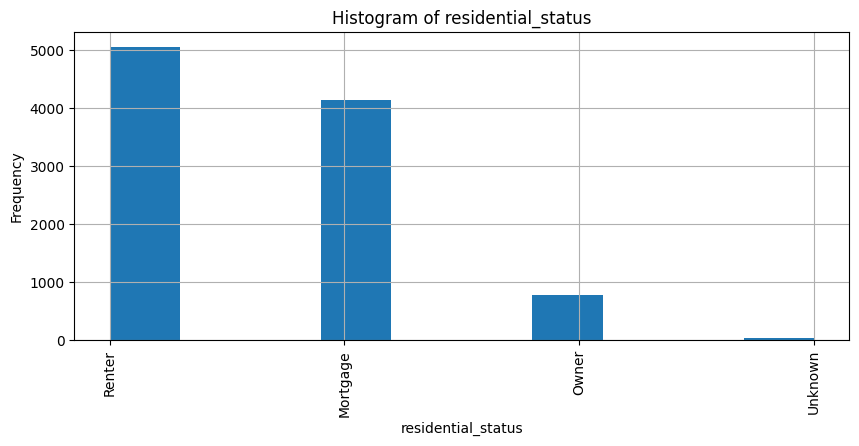

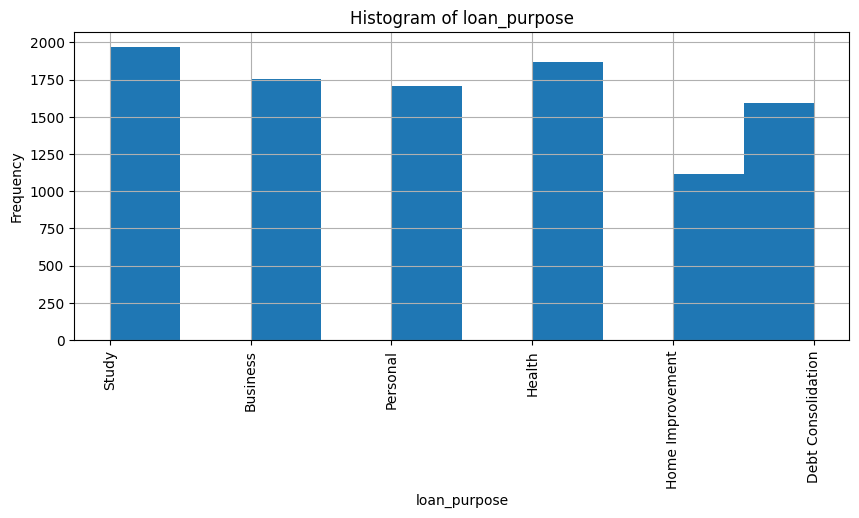

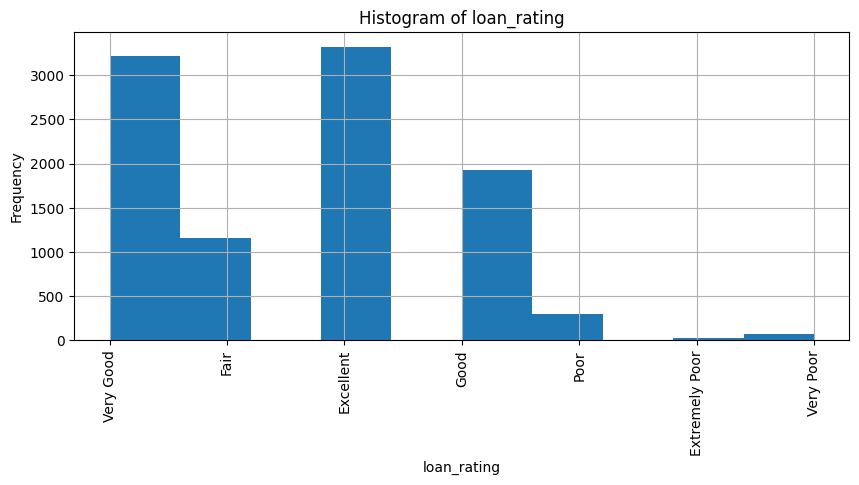

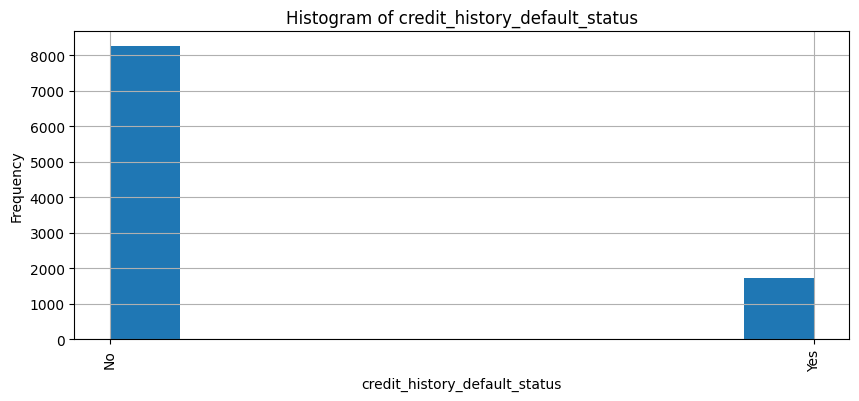

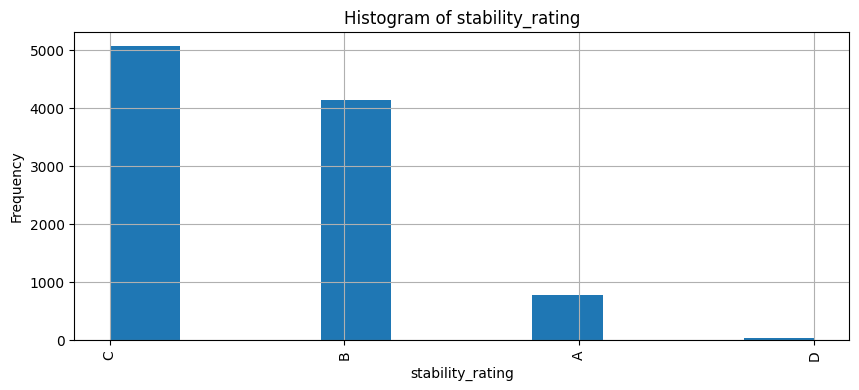

In [31]:

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    credit[col].hist()
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotește etichetele de pe axa x pentru lizibilitate
    plt.show()


### Analzia echilibrului de clase

Analiza setului de andtrenare pentru Credit

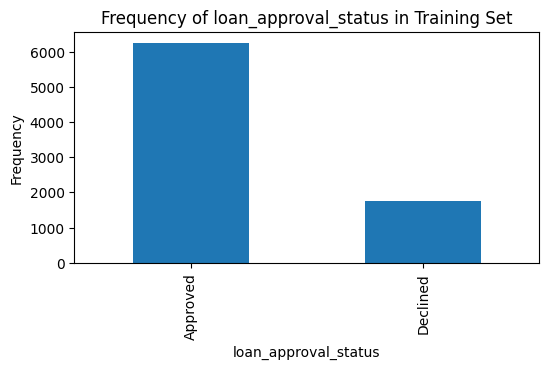

In [32]:
train_df = pd.read_csv('tema2_Credit_Risk/credit_risk_train.csv')

plt.figure(figsize=(6, 3))
train_df[label].value_counts().plot.bar()
plt.title(f'Frequency of {label} in Training Set')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotește etichetele de pe axa x pentru lizibilitate
plt.show()

Analiza setului de testare pentru Credit

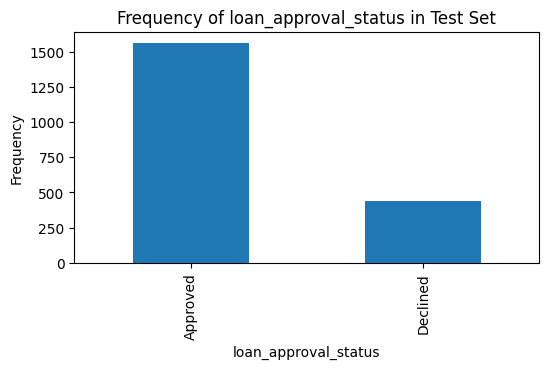

In [33]:
test_df = pd.read_csv('tema2_Credit_Risk/credit_risk_test.csv')

plt.figure(figsize=(6, 3))
test_df[label].value_counts().plot.bar()
plt.title(f'Frequency of {label} in Test Set')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotește etichetele de pe axa x pentru lizibilitate
plt.show()

### Analiza de corelatie pentru atribute

Analiza de corelatie pentru atributele continue

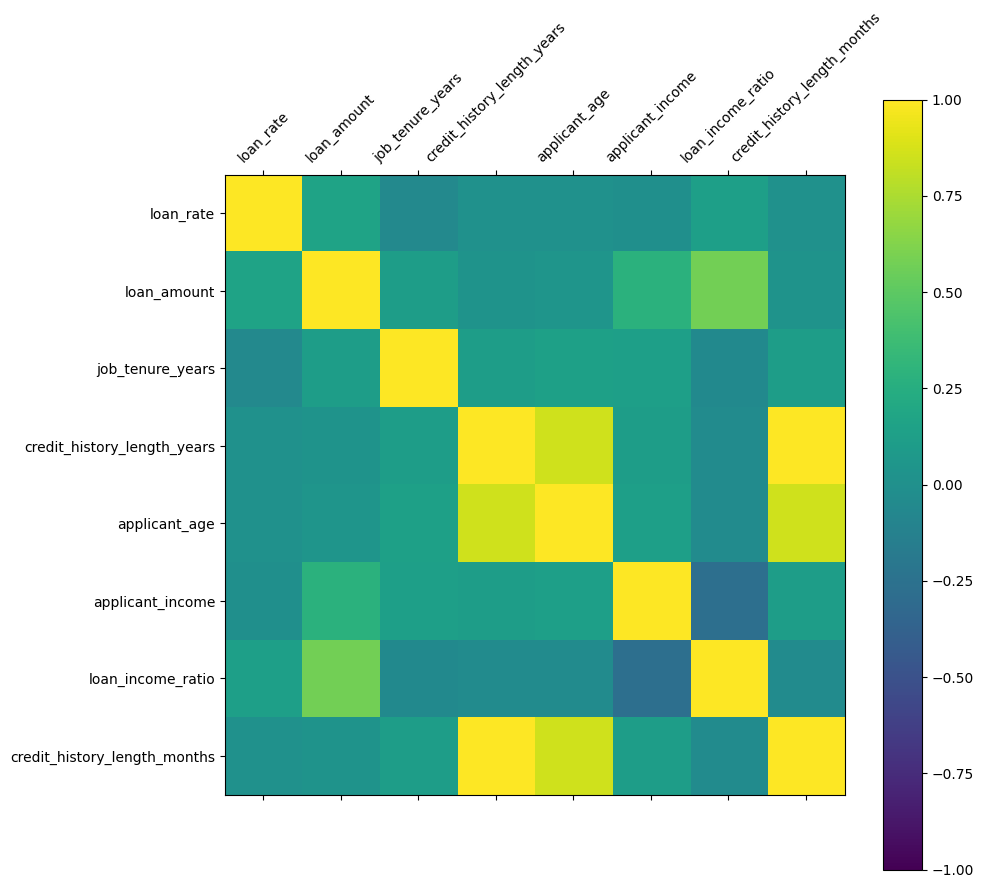

In [34]:
correlations = credit.corr(numeric_only=True, method='pearson')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(numerical_columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numerical_columns)
ax.set_yticklabels(numerical_columns)
plt.xticks(rotation=45)
plt.show()

Destul de multe atribute corelate, putem scapa de cateva.

Analiza de corelatie pentru atributele categorice

In [35]:
from itertools import combinations

correlations = pd.DataFrame(data={col:[0.0 for i in range(len(categorical_columns))] for col in categorical_columns}, columns=categorical_columns, index=categorical_columns)
for col in categorical_columns:
        correlations.loc[col, col] = np.float64(1.0)

for pair in combinations(categorical_columns, 2):
        CrossTabResult=pd.crosstab(index=credit[pair[0]], columns=credit[pair[1]])

        ChiSqResult = chi2_contingency(CrossTabResult)
        # P-Value is the Probability of H0 being True
        # If P-Value&gt;0.05 then only we Accept the assumption(H0)
        correlations.at[pair[0], pair[1]] = 0 if ChiSqResult[1] > 0.05 else 1
        correlations.at[pair[1], pair[0]] = 0 if ChiSqResult[1] > 0.05 else 1
        
        # print(f'{pair[0]} - {pair[1]}: The P-Value of the ChiSq Test is: {ChiSqResult[1]} so we {"accept" if ChiSqResult[1]>0.05 else "reject"} the assumption that the two attributes are independent')

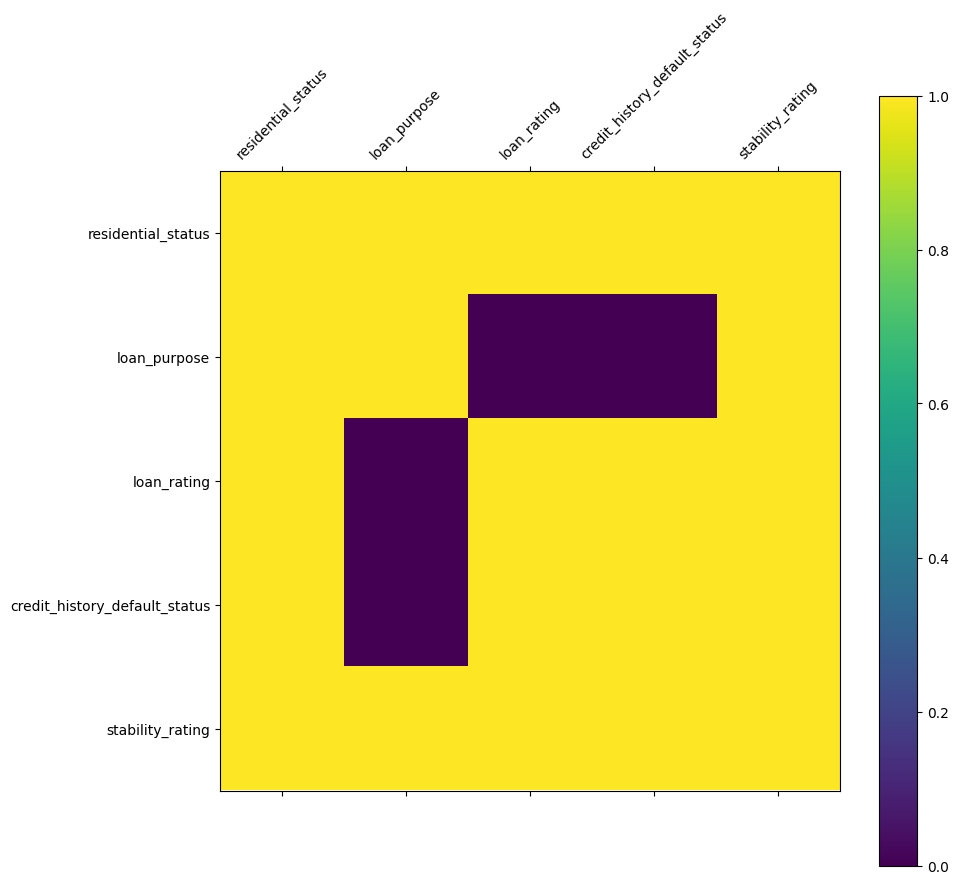

In [36]:
# print(correlations)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations)
fig.colorbar(cax)
ticks = np.arange(0,len(categorical_columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(categorical_columns)
ax.set_yticklabels(categorical_columns)
plt.xticks(rotation=45)
plt.show()

Si aici pare ca nu putem accepta ca variabilele sunt independente.

## Preprocesarea datelor

### Imputarea variabilelor lipsa si extreme

In [37]:

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(credit[numerical_columns])
credit[numerical_columns] = imp.transform(credit[numerical_columns])
credit.describe()

,loan_rate,loan_amount,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_income_ratio,credit_history_length_months
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,11.008052,9568.037500,4.771725,5.811100,27.745100,6.573421e+04,0.170130,75.760700
std,3.114894,6350.431581,4.298484,4.050217,6.360155,5.694439e+04,0.106814,48.677362
min,5.104274,500.000000,0.000000,2.000000,20.000000,4.200000e+03,0.000000,25.000000
25%,8.070000,5000.000000,2.000000,3.000000,23.000000,3.859500e+04,0.090000,41.000000
50%,10.990000,8000.000000,4.000000,4.000000,26.000000,5.500000e+04,0.150000,57.000000
75%,13.155245,12200.000000,7.000000,8.000000,30.000000,7.899700e+04,0.230000,102.000000
max,23.220000,35000.000000,123.000000,30.000000,123.000000,2.039784e+06,0.760000,369.000000


Nu este nevoie sa imputam si variabile categorice, deoarece nu lipsesc

### Stergerea maximelor si minimelor

In [38]:
for att in numerical_columns:
    Q1 = credit[att].quantile(0.25)
    Q3 = credit[att].quantile(0.75)
    iqr = Q3 - Q1
    threshold = 1.5
    salary.loc[(credit[att] < Q1 - threshold * iqr) | (credit[att] > Q3 + threshold * iqr), att] = np.nan

credit.describe()

,loan_rate,loan_amount,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_income_ratio,credit_history_length_months
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,11.008052,9568.037500,4.771725,5.811100,27.745100,6.573421e+04,0.170130,75.760700
std,3.114894,6350.431581,4.298484,4.050217,6.360155,5.694439e+04,0.106814,48.677362
min,5.104274,500.000000,0.000000,2.000000,20.000000,4.200000e+03,0.000000,25.000000
25%,8.070000,5000.000000,2.000000,3.000000,23.000000,3.859500e+04,0.090000,41.000000
50%,10.990000,8000.000000,4.000000,4.000000,26.000000,5.500000e+04,0.150000,57.000000
75%,13.155245,12200.000000,7.000000,8.000000,30.000000,7.899700e+04,0.230000,102.000000
max,23.220000,35000.000000,123.000000,30.000000,123.000000,2.039784e+06,0.760000,369.000000


In [39]:
imp.fit(credit[numerical_columns])
credit[numerical_columns] = imp.transform(credit[numerical_columns])
credit.describe()

,loan_rate,loan_amount,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_income_ratio,credit_history_length_months
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,11.008052,9568.037500,4.771725,5.811100,27.745100,6.573421e+04,0.170130,75.760700
std,3.114894,6350.431581,4.298484,4.050217,6.360155,5.694439e+04,0.106814,48.677362
min,5.104274,500.000000,0.000000,2.000000,20.000000,4.200000e+03,0.000000,25.000000
25%,8.070000,5000.000000,2.000000,3.000000,23.000000,3.859500e+04,0.090000,41.000000
50%,10.990000,8000.000000,4.000000,4.000000,26.000000,5.500000e+04,0.150000,57.000000
75%,13.155245,12200.000000,7.000000,8.000000,30.000000,7.899700e+04,0.230000,102.000000
max,23.220000,35000.000000,123.000000,30.000000,123.000000,2.039784e+06,0.760000,369.000000


Aparent nu sunt valori prea mari sau prea mici

### Atribute redundante

In [40]:
df = credit.drop(columns=['credit_history_length_months', 'applicant_age'])
## nu sunt prea sigur de aplicant_age
numerical_columns = df.describe().columns
categorical_columns = [attribute for attribute in df.columns if attribute not in numerical_columns]
df

,residential_status,loan_rate,loan_amount,loan_purpose,loan_approval_status,job_tenure_years,credit_history_length_years,applicant_income,loan_rating,credit_history_default_status,loan_income_ratio,stability_rating
0,Renter,9.990000,5600.0,Study,Approved,0.000000,4.0,36276.0,Very Good,No,0.15,C
1,Mortgage,16.770000,12000.0,Business,Approved,5.000000,2.0,64000.0,Fair,No,0.19,B
2,Renter,10.750000,5000.0,Business,Declined,2.243158,4.0,12360.0,Very Good,No,0.40,C
3,Mortgage,7.510000,13200.0,Personal,Approved,6.000000,12.0,83625.0,Excellent,No,0.16,B
4,Mortgage,12.990000,3500.0,Health,Approved,5.000000,2.0,24091.0,Good,Yes,0.15,B
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Renter,17.040000,7500.0,Business,Approved,7.000000,2.0,48000.0,Poor,Yes,0.16,C
9996,Owner,10.590000,2400.0,Business,Approved,0.000000,3.0,19200.0,Very Good,No,0.13,A
9997,Renter,10.572516,6000.0,Home Improvement,Approved,5.000000,3.0,82000.0,Good,No,0.07,C
9998,Renter,12.530000,1600.0,Personal,Approved,3.000000,3.0,25000.0,Good,No,0.06,C


### Plaje valorice de marimi diferite pentru atributele numerice

In [41]:

transformer = RobustScaler().fit(df[numerical_columns])
df[numerical_columns] = transformer.transform(df[numerical_columns])
df

,residential_status,loan_rate,loan_amount,loan_purpose,loan_approval_status,job_tenure_years,credit_history_length_years,applicant_income,loan_rating,credit_history_default_status,loan_income_ratio,stability_rating
0,Renter,-0.196647,-0.333333,Study,Approved,-0.800000,0.0,-0.463442,Very Good,No,0.000000,C
1,Mortgage,1.136622,0.555556,Business,Approved,0.200000,-0.4,0.222761,Fair,No,0.285714,B
2,Renter,-0.047195,-0.416667,Business,Declined,-0.351368,0.0,-1.055393,Very Good,No,1.785714,C
3,Mortgage,-0.684333,0.722222,Personal,Approved,0.400000,1.6,0.708505,Excellent,No,0.071429,B
4,Mortgage,0.393295,-0.625000,Health,Approved,0.200000,-0.4,-0.765036,Good,Yes,0.000000,B
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Renter,1.189717,-0.069444,Business,Approved,0.600000,-0.4,-0.173259,Poor,Yes,0.071429,C
9996,Owner,-0.078659,-0.777778,Business,Approved,-0.800000,-0.2,-0.886095,Very Good,No,-0.142857,A
9997,Renter,-0.082097,-0.277778,Home Improvement,Approved,0.200000,-0.2,0.668284,Good,No,-0.571429,C
9998,Renter,0.302837,-0.888889,Personal,Approved,-0.200000,-0.2,-0.742537,Good,No,-0.642857,C


# Utilizarea Algortmilor de invatare automata

## Arbori de decizie

### Sklearn

In [42]:
X = df.drop(columns=[label])
y = df[label]

X = pd.get_dummies(X)

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [43]:

clf = DecisionTreeClassifier(criterion='entropy', max_depth=100).fit(X_train, y_train)

credit_accuracy_dtc = accuracy_score(y_test, clf.predict(X_test))

precision_recall_fscore_credit_dtc = score(y_test, clf.predict(X_test), average='weighted')


## MLP

### Sklearn

In [44]:
X = df.drop(columns=[label])
y = df[label]

X = pd.get_dummies(X)

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

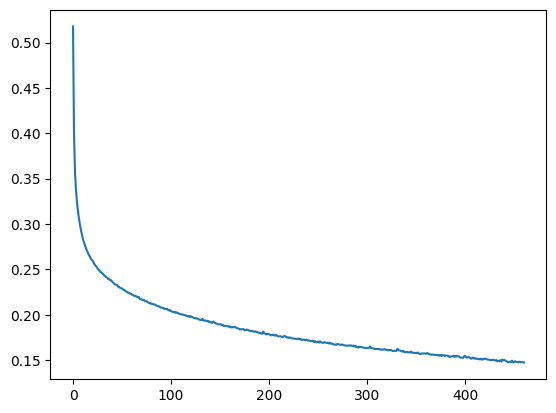

In [45]:
clf = MLPClassifier(random_state=1, max_iter=600).fit(X_train, y_train)

credit_accuracy_mlp = accuracy_score(y_test, clf.predict(X_test))

precision_recall_fscore_credit_mlp = score(y_test, clf.predict(X_test), average='weighted')

plt.plot(clf.loss_curve_)

In [46]:
prf = pd.DataFrame(data=[precision_recall_fscore_salary_dtc[:-1],
                   precision_recall_fscore_salary_mlp[:-1],
                   precision_recall_fscore_credit_dtc[:-1],
                   precision_recall_fscore_credit_mlp[:-1]], columns=['precision', 'recall', 'f1-score'], index=['salary_dtc', 'salary_mlp', 'credit_dtc', 'credit_mlp'])

In [47]:
acc = pd.Series(data=[salary_accuracy_dtc, salary_accuracy_mlp, credit_accuracy_dtc, credit_accuracy_mlp], name='accuracy', index=['salary_dtc', 'salary_mlp', 'credit_dtc', 'credit_mlp'])

In [48]:
results = pd.concat([prf, acc], axis=1)
results

,precision,recall,f1-score,accuracy
salary_dtc,0.785981,0.7790,0.782161,0.7790
salary_mlp,0.796638,0.8020,0.798933,0.8020
credit_dtc,0.881799,0.8800,0.880828,0.8800
credit_mlp,0.916115,0.9172,0.913273,0.9172
